## Assignment 2
### Group 14 

> Github repository: https://github.com/LivDreyer/CSS24.git

> Shortlog of git commits:
- x  LivDreyer
- x  AIAndreas
- x  FelixxAI


> Contribution: The workload was distributed equally between all members of the group. 



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import netwulf as nu
import json
from networkx.readwrite import json_graph
import random
import pandas as pd

### Part 1: Properties of the real-world network of Computational Social Scientists
#### Analyzing Networks through a Random Model

**1. Random Network:** Let's start by building a Random Network, acting as a baseline (or "null model") to understand the Computational Social Scientists Network better.


**First, calculate the probability (p) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding p, figure out the average degree (using the given formula).**

To calculate the probability *p* that the expected number of edges in our random network match the actual edge count in the CSS network, we look at equation 3.2 [1]: 

$$ <L> = p \frac{N(N-1)}{2}$$

As we know the number of links in our CSS network, we would like to isolate the probability *p* in the above equation like so: 

$$p = \frac{2L}{N(N-1)}$$

Please see the cell below and its output for the probability. 

In [283]:
# read the json file containing our network
with open('graph.json', 'r') as f:
    json_data = json.load(f)

G_CSS = nx.node_link_graph(json_data)

#get number of nodes and number of edges of CSS network
N = G_CSS.number_of_nodes()
L = G_CSS.number_of_edges()

#calculate probability p from formula
p = (2*L)/(N*(N-1))

print("Probability (p) that the expected number of edges in our random network match the actual edge count in the CSS network:", p)

Probability (p) that the expected number of edges in our random network match the actual edge count in the CSS network: 0.0004973040188454591


Furthermore, we would like to calculate the average degree of the random network utilizing formula 3.3 [1]:

$$<k> = p(N-1)$$

In [284]:
#calculate average degree k

k = p*(N-1)

print("Average degree k of a random network:", k)

Average degree k of a random network: 7.011489361702128



[1] Network Science. Albert-László Barabási. 2016. Cambridge United Kingdom: Cambridge University Press.

**Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated p. Generate a random network by linking nodes in every possible pair with probability p. Hint: you can use the function np.random.uniform to draw samples from a uniform probability distribution.**

In [285]:
#create function to generate a Random Network 

def generate_random_network(node_count, p, seed=None):
    #set random seed if provided
    if seed is not None:
        np.random.seed(seed)

    #create an empty graph
    G = nx.Graph()

    #add nodes
    G.add_nodes_from(range(node_count))

    #link nodes with probability p
    for i in range(node_count):
        for j in range(i+1, node_count):
            if np.random.uniform() < p:
                G.add_edge(i, j)

    return G


#define nodes and probability 
node_count =  N
p = p

#generate random network
random_network = generate_random_network(node_count, p)


print("Number of nodes in the Random Network:", random_network.number_of_nodes())
print("Number of edges in the Random Network:", random_network.number_of_edges())

Number of nodes in the Random Network: 14100
Number of edges in the Random Network: 49651


**Visualize the network as you did for the Computational Social Scientists network in the exercise above.**

To vizualize the Random Network we are using the netwulf library to create a graph. 

In [11]:
#function for visualizing network

def visualize(G):
    a, b = nu.visualize(G)
    return a, b


(<Figure size 480x480 with 1 Axes>, <Axes: >)

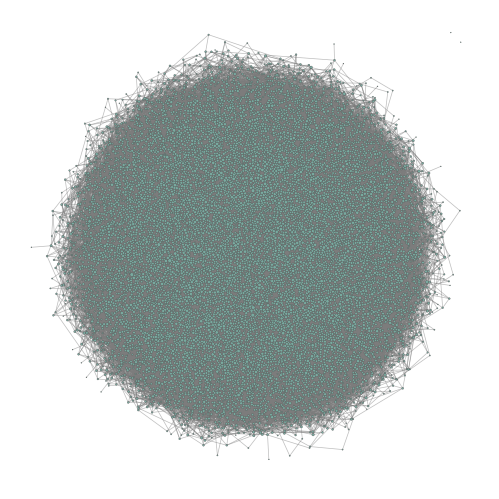

In [13]:

#visualize the plot using netwulf 
nu.draw_netwulf(visualize(random_network)[0])

**Answer the following questions (max 200 words in total):**

> What regime does your random network fall into? Is it above or below the critical threshold?

Given the average degree *k* of 7.011, the random network created in this exercise falls into the supercritical regime as $<k>$ > 1 but does not satisfy the criteria for it to fall into a connected regime. The average degree of 7.011 also mean it is above the critical point of $<k>$ = 1. 

> According to the textbook, what does the network's structure resemble in this regime?

According to the textbook, the random network's structure resembles a giant component with several isolated nodes. This agrees with the above visualization. 

> Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

We have included the visualization of the CSS-network below followed by an answer.

(<Figure size 480x480 with 1 Axes>, <Axes: >)

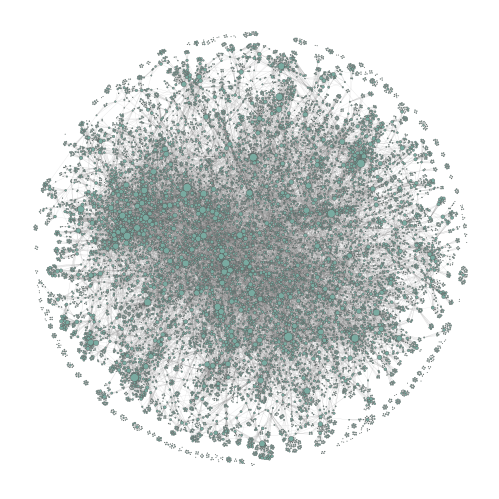

In [12]:
#CSS 
with open('graph.json', 'r') as f:
    json_data = json.load(f)
    
G_CSS = nx.node_link_graph(json_data)

#remove the "country" attribute from each node because it has NaN
for node in G_CSS.nodes():
    if "country" in G_CSS.nodes[node]:
        del G_CSS.nodes[node]["country"]

nu.draw_netwulf(visualize(G_CSS)[0])



One key difference between the actual and the random network is the clustering. The actual network has visable clusters that presumably indicates collaborations between authors that are closely linked in either field of research or physical vicinity. The random network fails to capture these clusters which consists with expectations (section 3.9 [1]). Another key difference observed between the two networks is how the random network fails to capture nodes with a high degree. Because the degrees of the nodes of the random network are all in the vicinity of the average degree $<k>$, we do not see any nodes as highly influential as it is often the case in real networks (section 3.5 [1]).

**2. Degree Distribution:** This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.

**Compute the distribution of degree for the random network using the numpy function `np.histogram`. Choose bins, and normalization strategies appropriately. Hint: Revisit the content from Week 3, Part 3 of the lectures.**

We construct a dictionary representing the degree distribution of the Random Network. Each key in the dictionary corresponds to a degree ranging from the minimum to the maximum degree observed in the network. The values associated with these keys indicate the frequency of nodes having that particular degree.

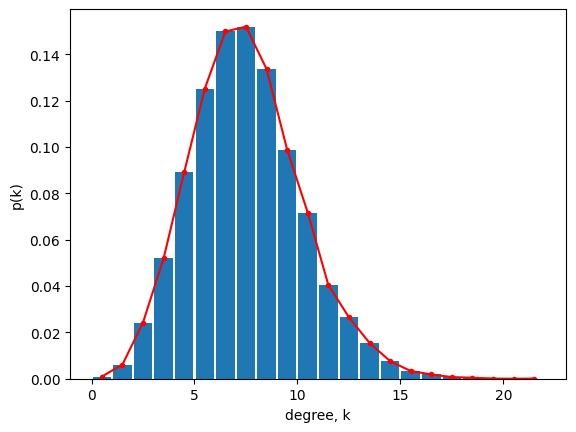

In [277]:
#init random network
G_random = random_network

#construct dict of network
degree_dict = dict(G_random.degree())

#dict values 
degrees = np.array(list(degree_dict.values()))

#compute histogram 
bins = np.linspace(min(degrees),max(degrees),23)
hist, edges = np.histogram(degrees,bins=bins,density=True)
width = bins[1]-bins[0]
x = (edges[1:]+edges[:-1])/2

#plot
fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.plot(x,hist,marker=".",color="red")
ax.set_xlabel("degree, k")
ax.set_ylabel("p(k)")


**Compute the distribution of degree for the Computational Social Scientists network using the numpy function `np.histogram`. Also here, choose bins and normalization strategies wisely, based on the recommendations from previous lectures.**

In [223]:
#read the network of authors constructed in Assignment1 from the git
with open('graph.json', 'r') as f:
    json_data = json.load(f)

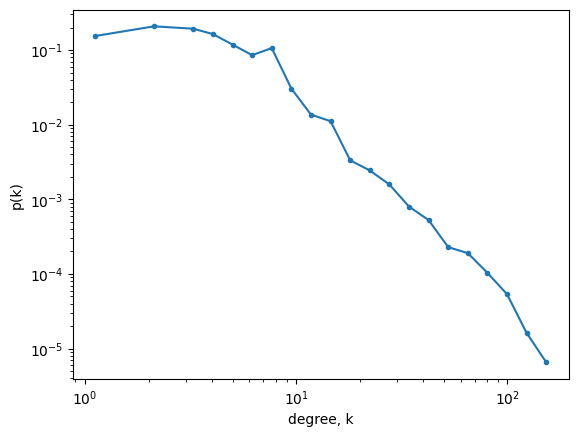

In [228]:
#reconstruct the graph from the JSON data
G_CSS = nx.node_link_graph(json_data)

#create dictionary of values 
degree_dict_CSS = dict(G_CSS.degree())
values = list(degree_dict_CSS.values())

#compute hist with logspace
bins = np.logspace(0,np.log10(max(values)),25)
hist, edges = np.histogram(values,bins=bins, density =True)
x= (edges[1:]+edges[:-1])/2

xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])

#plot and logscale 
fig,ax = plt.subplots()
ax.plot(xx,yy,marker=".")
ax.set_xlabel("degree, k")
ax.set_ylabel("p(k)")
ax.set_xscale("log")
ax.set_yscale("log")


**Plot both degree distributions on the same figure using line plots, ensuring the x and y axes are scaled in a way that allows for comparison between the two distributions. Add two vertical lines showing the average degree for the random and the real network.**

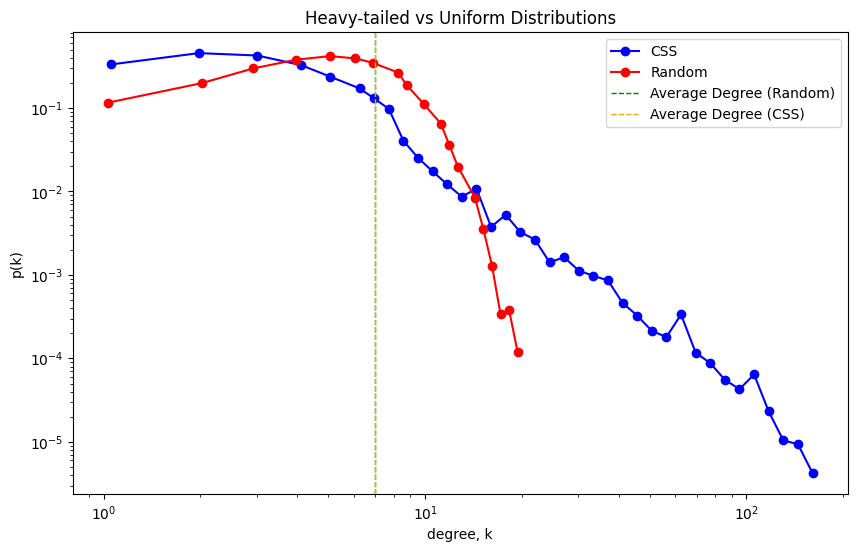

In [16]:
#random (using logspace)
G_random = random_network
degree_dict = dict(G_random.degree())
degrees = np.array(list(degree_dict.values()))
bins_lin = np.logspace(0, np.log10(max(degrees)), 50)
hist_lin, edges_lin = np.histogram(degrees, bins=bins_lin, density=True)
x_lin = (edges_lin[1:] + edges_lin[:-1]) / 2

#CSS
G_CSS = G_CSS  
degree_dict_CSS = dict(G_CSS.degree())
values = list(degree_dict_CSS.values())
bins_log = np.logspace(0, np.log10(max(values)), 50)
hist_log, edges_log = np.histogram(values, bins=bins_log, density=True)
x_log = (edges_log[1:] + edges_log[:-1]) / 2

xx_log, yy_log = zip(*[(i, j) for (i, j) in zip(x_log, hist_log) if j > 0])
xx_lin, yy_lin = zip(*[(i, j) for (i, j) in zip(x_lin, hist_lin) if j > 0])

#plot
fig, ax = plt.subplots(figsize=(10, 6))

#CSS lineplot
ax.plot(xx_log, yy_log, marker='o', linestyle='-', color='blue', label='CSS')

#random lineplot 
ax.plot(xx_lin, yy_lin, marker='o', linestyle='-', color='red', label='Random')

#add average degree 
avg_degree_random = np.mean(degrees)
avg_degree_CSS = np.mean(values)

ax.axvline(x=avg_degree_random, color='green', linestyle='--', linewidth=1, label='Average Degree (Random)')
ax.axvline(x=avg_degree_CSS, color='orange', linestyle='--', linewidth=1, label='Average Degree (CSS)')

# Adding labels and legend
ax.set_title('Heavy-tailed vs Uniform Distributions')
ax.set_xlabel('degree, k')
ax.set_ylabel('p(k)')
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

# Show plot
plt.show()


**Answer the following questions (max 200 words in total):**

> Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.

As discussed in the lectures, we anticipate that the median of the degrees within the real network will more accurately depict its characteristics. Here, the median degree stands at 5, whereas the average degree is around 7. However, neither offers a comprehensive understanding of highly connected nodes leading to a lack of information about authors who has many collaborations. As seen on the plot above, the average degree of both networks are almost identical. For the random network it seems to capture the characteristics of the network quite well considering the degree distribution, and how the degree of most nodes are around $<k>$ (section 3.5[1]). 

> What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties? (max 150 words)

As the random network can be considered large, it can be said it follows a poisson distribution. Furthermore, it means that if N is increased, it will still follow a poisson distribution, and will still peak around $<k>$. The degree distribution of the real network suggests it follows a power-law distribution, and is scale-free. One significant difference is the lack of hubs in the random network. Hubs in the real network are presumably authors operating in multiple research-fields, who connect smaller nodes. 

### Part 2: Network Analysis in Computational Social Science
#### Exercise 1: Mixing Patterns and Assortativity

#### Part 1: Assortativity Coefficient

**Calculate the Assortativity Coefficient for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in this paper (equation 2, here for directed networks). Do not use the NetworkX implementation.**

In [5]:
file = 'graph.json'
graph = json.load(open(file))

#create dictionary to quickly look up the country of an author
author_country_dict = {}
for node in graph['nodes']:
    author_id = node['id']
    country = node['country']
    author_country_dict[author_id] = country

#count the number of times that a collaboration happens between authors from the same country
same_country_edges = 0
for edge in graph['links']:
        source_country = author_country_dict[edge['source']]
        target_country = author_country_dict[edge['target']]
        if source_country == target_country:
            same_country_edges += 1
same_country_edges
e = same_country_edges/len(graph['links'])

#fraction of "half-edges" that start from a country
country_half_edges = {}
for edge in graph['links']:
    country_half_edges[author_country_dict[edge['source']]] = country_half_edges.get(author_country_dict[edge['source']], 0) + 1
    country_half_edges[author_country_dict[edge['target']]] = country_half_edges.get(author_country_dict[edge['target']], 0) + 1 # We need to consinder both ends of the edge
fraction_half_edges = [x/sum(country_half_edges.values()) for x in country_half_edges.values()]
a = sum(x*x for x in fraction_half_edges)

#calculate the assortativity
r = (e - a)/(1 - a)

#calculate the assortativity with networkx
G = json_graph.node_link_graph(graph)
assortivity = nx.attribute_assortativity_coefficient(G, 'country')
print("Comparison of the assortativity coefficients found by the formula and by networkx")
print(f"Formula = {r}, Networkx = {assortivity}")

Comparison of the assortativity coefficients found by the formula and by networkx
Formula = 0.41449595905496983, Networkx = 0.4156356044541185


#### Part 2: Configuration model

In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.

**Implement the configuration model using the double edge swap algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:**

> **a.** Create an exact copy of your original network. 

> **b.** Select two edges, $e_1 = (u,v)$ and $e_2 = (x,y)$, ensuring u ≠ y and v ≠ x. 

> **c.** Flip the direction of $e_1$ to $e_1 = (v,u)$ 50% of the time. This ensures that your final result is not biased, in case your edges were sorted. 

> **d.** Ensure that new edges $(e_1' = (e_1 \lfloor 0 \rfloor), (e_2 \lfloor 1 \rfloor))$ and $(e_2' = (e_2 \lfloor 0 \rfloor), (e_1 \lfloor 1 \rfloor))$ do not already exists in the network.

> **e.** Remove edges $e_1$ and $e_2$ and add edges $e_1'$ and $e_2'$.

> **f.** Repeat step **b** to **e** until you have performed *E\*10* swaps where E is the total number of edges. 

In [6]:
def generate_random_network(graph, print_swaps=False):
    random_graph = graph.copy()
    keys, degrees = zip(*random_graph.degree())  #convert edges to a list
    cdf = nx.utils.cumulative_distribution(degrees)  #create a cumulative distribution function
    cdf[-1] = 1.0   #ensure that the cdf is normalized
    nswaps = 0
    maxswaps = len(random_graph.edges())

    while (nswaps < maxswaps):
        if print_swaps and nswaps % 1000 == 0:
            print(f"Swaps: {nswaps}/{maxswaps}")

        #choose random indices from the cdf
        ui = np.searchsorted(cdf, random.random())
        xi = np.searchsorted(cdf, random.random())

        #ensure that they are not the same indices this also ensures that the nodes are not the same
        if ui == xi:
            continue

        #ensure that indices are not out of bounds
        if ui == len(keys):
            ui = ui - 1
        if xi == len(keys):
            xi = xi - 1

        #get root nodes
        u, x = keys[ui], keys[xi]

        #check that the nodes have any edges
        if random_graph.degree(u) < 1 or random_graph.degree(x) < 1:
            continue

        #choose randomly from edges associated with root node
        v = random.choice(list(random_graph[u]))
        y = random.choice(list(random_graph[x]))

        #define our selected edges
        e1, e2 = (u,v), (x,y)

        
        if (v not in random_graph[x]) and (y not in random_graph[u]):
            try:  #sometimes the graph can not find the edge in the network, so we need to catch the exception
                random_graph.remove_edge(*e1)
                random_graph.remove_edge(*e2)
            
            except Exception:
                continue
            
            if random.choice(['flip', 'no-flip']) == 'flip': #this seems to make the method worse, as they do not have the same number of degrees with this included. 
                e1 = (e1[1], e1[0])

            random_graph.add_edge(e1[0], e2[1])
            random_graph.add_edge(e2[0], e1[1])
            nswaps += 1
    return random_graph

randomized_graph = generate_random_network(G)

**Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.**

In [20]:
average_degree_graph = sum(dict(G.degree()).values()) / len(G)
average_degree_randomized_graph = sum(dict(randomized_graph.degree()).values()) / len(randomized_graph)

print("Average Degree of Graph:", average_degree_graph)
print("Average Degree of Randomized Graph:", average_degree_randomized_graph)

Average Degree of Graph: 7.011489361702128
Average Degree of Randomized Graph: 7.002127659574468


#### Part 3: Analyzing Assortativity in Random Networks

**Generate and analyze at least 100 random networks using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.**

In [21]:
#generate 100 random networks
random_networks = []
for _ in range(100):
    random_network = generate_random_network(G)
    random_networks.append(random_network)

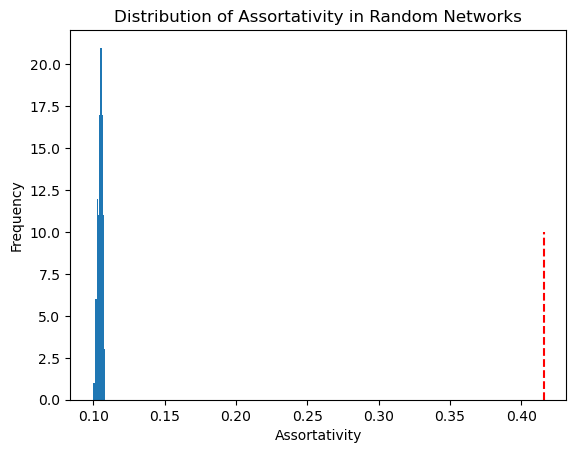

Assortativity of original network: 0.41563560445411835
Mean assortativity of random networks: 0.10485775698114874
Standard deviation of assortativity in random networks: 0.0016761690314118086


In [23]:
#calculate assortativity for each random network
assortativity_values = []
for random_network in random_networks:
    assortativity = nx.attribute_assortativity_coefficient(random_network, 'country')
    assortativity_values.append(assortativity)

#compare assortativity of original network with the distribution
original_assortativity = nx.attribute_assortativity_coefficient(G, 'country')
mean_assortativity = np.mean(assortativity_values)
std_assortativity = np.std(assortativity_values)

#plot the distribution of assortativity values
plt.hist(assortativity_values)
plt.vlines(original_assortativity, 0, 10, linestyles='dashed', color='red', label='Original Assortativity')
plt.xlabel('Assortativity')
plt.ylabel('Frequency')
plt.title('Distribution of Assortativity in Random Networks')
plt.show()

print(f"Assortativity of original network: {original_assortativity}")
print(f"Mean assortativity of random networks: {mean_assortativity}")
print(f"Standard deviation of assortativity in random networks: {std_assortativity}")

From the figure, we can see that the distribution of assortativity coeffecients with repects to country for the random networks is very centered around 0.105 and has a small deviation of 0.0017. As the distribution is very centered around its mean, there is significant difference between the assortativity of the random networks and the original network. Thus, we can conclude that the assortivity coeffecient for the property 'country' of the original network is significantly higher not by chance.

#### Part 4: Assortativity by Degree

**Calculate degree assortativity for your network using the formula discussed in the lecture.**

In [8]:
def calc_degree_assortativity(network):
    degrees = network.degree    
    # Calculate the average degree of the network (target * source)
    degree_product = [degrees[source] * degrees[target] for source, target in G.edges]
    average_degree_product = sum(degree_product) / len(degree_product)

    # Calculate the average degree for the source nodes
    average_source_degree = sum(degrees[source] for source, _ in G.edges) / len(G.edges)

    # Calculate the average degree for the target nodes
    average_target_degree = sum(degrees[target] for _, target in G.edges) / len(G.edges)

    # Calculate the average degree for the source nodes
    average_source_degree_powered = sum(degrees[source]**2 for source, _ in G.edges) / len(G.edges)

    # Calculate the average degree for the target nodes
    average_target_degree_powered = sum(degrees[target]**2 for _, target in G.edges) / len(G.edges)

    #Calculate the assortativity coefficient for degree
    r_formula = (average_degree_product - average_source_degree * average_target_degree) / (np.sqrt(average_source_degree_powered - average_source_degree**2) * np.sqrt(average_target_degree_powered - average_target_degree**2))

    return r_formula

r_formula = calc_degree_assortativity(G)

print('Original Netork Degree Assortativity:', r_formula)


Original Netork Degree Assortativity: -0.005057443810705295


**Compare your network's degree assortativity against that of 100 random networks generated via the configuration model. Analyze whether your network shows a tendency for high-degree scientists to connect with other high-degree scientists and vice versa.**

In [7]:

#calculate assortativity for each random network
assortativity_values = []
for random_network in random_networks:
    assortativity =  calc_degree_assortativity(random_network)
    assortativity_values.append(assortativity)

#compare assortativity of original network with the distribution
original_assortativity = calc_degree_assortativity(G)
mean_assortativity = np.mean(assortativity_values)
std_assortativity = np.std(assortativity_values)

#plot the distribution of assortativity values
plt.hist(assortativity_values)
plt.vlines(original_assortativity, 0, 10, linestyles='dashed', color='red', label='Original Assortativity')
plt.xlabel('Assortativity')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Assortativity in Random Networks')
plt.show()

print(f"Assortativity of original network: {original_assortativity}")
print(f"Mean assortativity of random networks: {mean_assortativity}")
print(f"Standard deviation of assortativity in random networks: {std_assortativity}")

NameError: name 'random_networks' is not defined

The degree assortativity coeffecient for the original network is around r=-0.005, which is in the interval -1 > r > 0 for disassortative networks. This would suggest that the network has a smell tendency to have centralized figures collaborate with smaller figures, however as the degree assortativity coeffecient for the interval is so close to 0, it could also be argued that the network is neutral, therefore the connections are independent of the node's degree. However, as the degree assortativity coeffecient for the random networks is almost the same as the original network, it is hard to conclude that the degree assortativity coeffecient for the original network is not solely derived by chance. 

#### Part 5: Reflection questions (max 250 words for the 3 questions)

> *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?

Our graph collects the collaborations between researchers that are related to social science, as such it could be expected that the network describes connections between friends and colleagues in a larger social network. Therefore, we would expect the network to be assortative - high degree nodes connect to high degree nodes, and low degree nodes connect to low degree nodes. However, this is not found to be the case for our network, as the degree assortativity coefficient falls within the interval for disassortative networks.

> *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing e_1 from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?

As we are dealing with non-directed networks, the step of flipping e_1 50% of the time is to reduce the bias that we assume u is a source node or v is a target node. Instead we should assume that e_1 is a relation between the two, and therefore we randomly select either u or v as the target node in the new edge.

> *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.

As mentioned earlier, the degree assortativity coefficients of the randomized networks seems to be around the coefficient of the original network. The mean of coefficients for the random networks seems to be a bit lower than the original network with a very small standard deviation, but no significant difference between the random and original networks. This is expected as we are using a configuration model that withholds the original network's degree distribution, therefore the degree assortativity values are not drastically different from the original network.

#### Exercise 2: Central nodes

In [ ]:
closeness_centralities = nx.closeness_centrality(G)
top_5_closeness = sorted(closeness_centralities.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness_scientists_for_cent = [scientist for scientist, _ in top_5_closeness]

eigenvector_centralities = nx.eigenvector_centrality(G)
top_5_closeness = sorted(eigenvector_centralities.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness_scientists_for_eig = [scientist for scientist, _ in top_5_closeness]

In [45]:
df = pd.read_csv('final_authors_dataset.csv')


print("Top 5 scientists according to closeness centrality:")
for scientist in top_5_closeness_scientists_for_cent:
    print("Author_name: " + df[df['id'].str.contains(scientist)]['display_name'].to_string(index=False)+ " || Author_id: " + scientist)

print(" ")

print("Top 5 scientists according to eigenvector centrality:")
for scientist in top_5_closeness_scientists_for_eig:
    print("Author_name: " + df[df['id'].str.contains(scientist)]['display_name'].to_string(index=False) + " || Author_id: " + scientist)

Top 5 scientists according to closeness centrality:
Author_name: Filippo Menczer || Author_id: https://openalex.org/A5021346979
Author_name: Carlos Castillo || Author_id: https://openalex.org/A5084282503
Author_name: Bruno Lepri || Author_id: https://openalex.org/A5048877432
Author_name: Iyad Rahwan || Author_id: https://openalex.org/A5009232244
Author_name: Yong‐Yeol Ahn || Author_id: https://openalex.org/A5059236838
 
Top 5 scientists according to eigenvector centrality:
Author_name: Nicola Perra || Author_id: https://openalex.org/A5031799782
Author_name: Alessandro Vespignani || Author_id: https://openalex.org/A5046546654
Author_name: Filippo Menczer || Author_id: https://openalex.org/A5021346979
Author_name: Alain Barrat || Author_id: https://openalex.org/A5014662127
Author_name: Bruno Gonçalves || Author_id: https://openalex.org/A5039841997


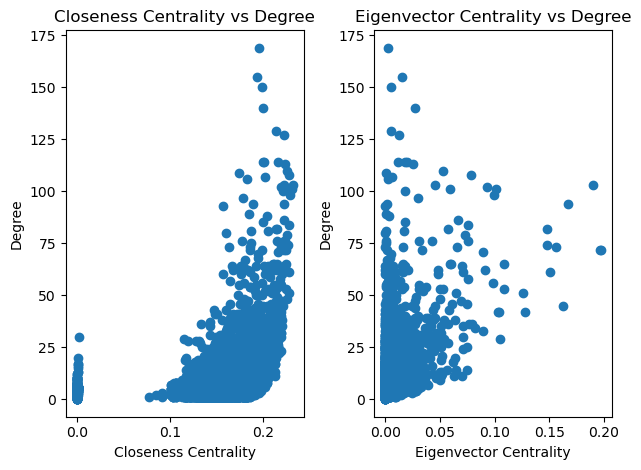

In [14]:
#get the degree and closeness centrality of each node
degrees = dict(G.degree())

#create lists to store the degree and closeness centrality values
degree_values = []
closeness_values = []
eigenvector_values = []

#iterate over each node and append its degree and closeness centrality to the lists
for node in G.nodes():
    degree_values.append(degrees[node])
    closeness_values.append(closeness_centralities[node])
    eigenvector_values.append(eigenvector_centralities[node])


#plot the closeness centrality of nodes vs their degree
plt.subplot(1,2,1)
plt.scatter(closeness_values, degree_values)
plt.ylabel('Degree')
plt.xlabel('Closeness Centrality')
plt.title('Closeness Centrality vs Degree')

# Plot the eigenvector centrality of nodes vs their degree
plt.subplot(1,2,2)
plt.scatter(eigenvector_values, degree_values)
plt.ylabel('Degree')
plt.xlabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality vs Degree')

plt.tight_layout()
plt.show()


> Find the 5 most central scientists according to the closeness centrality and eigenvector centrality. What role do you imagine scientists with high closeness centrality play?

*Closeness Centrality:*  These scientists must be leaders in the community, where they have quick acces to information from other colleagues or they could be providers for the community, where they put together resources for new projects etc.

*Eigenvector Centrality:* These must be the more renowned researchers in the community - the most influential scientists.

> Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?

*Closeness Centrality:* It would be expected that the higher degrees the higher the closeness centrality, as the more collaborations the researchers have contributed with the more they connected they are in the network. However, as seen on the first figure in the subplot, this is not necessarily the case. The closeness centrality seems to be correlated up to a certain point then decreases afterwards, this would suggest that merely adding more connections doesn't significantly reduce the path length to other researchers.

*Eigenvector Centrality:* From the other illustration, it can be observed that the eigenvector centrality vs. degree does not follow a similiar linear relationship. This is kinda what we expected, as the number of collaborations does not necessarily correlate with how influential a researcher are in the field. This may be a result of most the researchers having another main field, and therefore they have only made minor contributions to the field of Computational Social Science.

> Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

From the figures, it is clear that there is difference between the two centrality methods. The whole network seems to be well connceted and "close" to eachother, as most of the nodes has a high closeness centrality. Meanwhile, the network seems to be dominated by some key figures that achieve a high value of eigenvector centrality, which could mean that only a handful of researchers have the luxury of good connections within the network.

### Part 3 - Words that characterize Computational Social Science communities

#### Exercise 1: TF-IDF and the Computational Social Science communities. 

The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists. What you need for this exercise:

- The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.
- The tokenized abstract dataframe (Week 7, Exercise 2)


**First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf–idf). Explain in your own words the point of TF-IDF.**

> What does TF stand for? 

*TF* stands for Term Frequency tf(t,d) and it is the relative frequency of a term t, within a certain document d. 


> What does IDF stand for? 

*IDF* stands for Inverse Document frequency, and measures the amount of information the word provides, which is basically how common or rare it is across all documents. More mathematically is it the logarithmically scaled inverse fraction of the documents containing the word/term, this is obtained by dividing the toal number of documents by the number of documents containing the word/term



The point of TF-IDF is to acquire keywords or key terms from a corpus of documents. Terms/words with high TD-IDF are considered significant and therefore often represent important concepts in the corpus of documents. It can also be usefull for information retrieval where TF-IDF can be used to rank documents based on how relavent they are to the particular query.

**Now, we want to find out which words are important for each community, so we're going to create several large documents, one for each community. Each document includes all the tokens of abstracts written by members of a given community.**

> Consider a community *c* 

> Find all the abstracts of papers written by a member of community *c*



In [4]:
import json
import pandas as pd
import ast

with open('louvain_communities.json', 'r') as f:
    partition = json.load(f)
    
df_papers = pd.read_csv('final_papers.csv')
df_abstracts = pd.read_csv('final_abstracts_with_collocations.csv')
df_papers['author_ids'] = df_papers['author_ids'].apply(ast.literal_eval)
df_papers_exploded = df_papers.explode('author_ids')
df_papers_exploded['community'] = df_papers_exploded['author_ids'].map(partition)
df_abstracts['tokens'] = df_abstracts['tokens_with_collocations'].apply(ast.literal_eval)
df_merged = df_abstracts.merge(df_papers_exploded, left_on='id', right_on='id', how='inner')
community_docs = df_merged.groupby(['community', 'id'])['tokens'].agg(lambda x: ' '.join([' '.join(tokens) for tokens in x])).groupby('community').agg(' '.join).reset_index(name='community_doc')



> Create a long array that stores all the abstract tokens


In [5]:

community_tokens = {}
for index, row in community_docs.iterrows():
    community = row['community']
    tokens = row['community_doc'].split()
    community_tokens[community] = tokens
sample_community = 0.0  
print(f"Sample tokens for community {sample_community}:")
print(community_tokens[sample_community][:100]) 


Sample tokens for community 0.0:
['two', 'kinds', 'bidders', 'sponsored', 'search', 'keep', 'bids', 'static', 'long', 'periods', 'time', 'actively', 'manage', 'bids', 'work', 'develop', 'model', 'bidder', 'behavior', 'search', 'applies', 'active', 'inactive', 'bidders', 'observations', 'real', 'keyword', 'auction', 'data', 'show', 'advertisers', 'see', 'substantial', 'variation', 'rank', 'even', 'static', 'motivates', 'discrete', 'choice', 'approach', 'bypasses', 'directly', 'models', 'advertisers', 'perhaps', 'passive', 'rank', 'models', 'value', 'per', 'click', 'estimates', 'consistent', 'basic', 'theory', 'states', 'exceed', 'values', 'though', 'used', 'fit', 'model', 'empirical', 'evaluation', 'confirms', 'performs', 'well', 'terms', 'predicting', 'realized', 'ranks', 'clicks', 'work', 'study', 'use', 'twitter', 'house', 'senate', 'gubernatorial', 'candidates', 'midterm', '2010', 'elections', 'us', 'data', 'includes', 'almost', '700', '690k', 'documents', 'produced', 'cited', '35',

> Repeat for all the communities. Note: Here, to ensure your code is efficient, you shall exploit `pandas` builtin functions, such as `groupby.apply` or `explode`.

In [6]:

if isinstance(df_merged['tokens'].iloc[0], str):
    df_merged['tokens'] = df_merged['tokens'].apply(ast.literal_eval)
community_tokens = df_merged.groupby('community')['tokens'].apply(lambda x: [token for sublist in x for token in sublist]).reset_index(name='all_tokens')
for i in range(min(5, len(community_tokens))): 
    print(f"Sample tokens for Community {community_tokens.iloc[i]['community']}:")
    print(community_tokens.iloc[i]['all_tokens'][:25])  
    print("\n") 



Sample tokens for Community 0.0:
['complex', 'cognitive processes', 'require', 'neuronal activity', 'coordinated', 'across multiple', 'scales', 'ranging', 'local', 'microcircuits', 'cortexwide', 'networks however', 'multiscale', 'cortical', 'dynamics', 'well understood', 'experimental', 'approaches', 'provided', 'sufficient', 'support hypotheses', 'involving', 'interactions', 'address limitations', 'used']


Sample tokens for Community 1.0:
['using', 'opensource', 'java', 'toolkit', 'namematching', 'methods', 'experimentally', 'compare', 'string', 'distance', 'metrics', 'task', 'matching', 'entity', 'names', 'investigate', 'number different', 'proposed', 'communities', 'including', 'editdistance', 'metrics', 'fast', 'heuristic', 'comparators']


Sample tokens for Community 3.0:
['kinship', 'care', 'arrangements', 'become common', 'providing', 'services', 'address', 'needs', 'relative', 'caregivers', 'children', 'growing concern', 'social', 'workers', 'familyservice', 'professionals', '

**Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the top 5 communities (by number of authors).**

> Describe similarities and differences between the communities.

Both model and data appears across multiple communities which is in line with the expectations as these are scientific papers where one may hope the use of data and models are prevalent. The diffrences are not that noticeable, but one of the differences can be seen in community 34 for example, with the top terms being "users" and "information" which might indicate a focus on user related research or behaviour.

> Why aren't the TFs not necessarily a good description of the communities?

Term Frequency can provide a basic understanding of the most prevalent words with a communities's corpus of documenmts. Howeveer relying only on TF to describe the communitites might not always provide a comprehensive or accurate representation.
One of the reasons is that terms with high TF might be common across many communities or generally prevalent in acedemic writing. These terms could be some of the same we saw in the output before such as, "model", "data" and "using". These words can be frequent but does not necceasarily provide distic characteristic describing a community. 
Then there is also the distictive lack of context. TF counts words in isolation, and therefore ignores the context. Which basically means that it does not acount for the meaning of the word when set in combination with another.


In [7]:
community_size = df_papers_exploded.groupby('community')['author_ids'].nunique().reset_index(name='size')
top_communities = community_size.sort_values(by='size', ascending=False).head(5)
print("Top 5 communities by size:")
print(top_communities)
top_community_tokens = {}
for community in top_communities['community'].values:
    community_tokens_list = df_merged[df_merged['community'] == community]['tokens'].tolist()
    all_tokens = [token for sublist in community_tokens_list for token in sublist]
    term_frequencies = pd.Series(all_tokens).value_counts(normalize=True)
    top_5_terms = term_frequencies.head(5)
    print(f"Top 5 terms in Community {community}:")
    print(top_5_terms)
    print("\n")

for community, top_terms in top_community_tokens.items():
    print(f"\nTop 5 terms for Community {community}:")
    print(top_terms)


Top 5 communities by size:
    community  size
4         5.0   638
89       98.0   575
26       28.0   535
33       35.0   535
77       84.0   400
Top 5 terms in Community 5.0:
networks    0.002773
model       0.002676
network     0.002588
data        0.002317
show        0.002229
Name: proportion, dtype: float64


Top 5 terms in Community 98.0:
model       0.003672
networks    0.003404
network     0.003395
find        0.002866
show        0.002750
Name: proportion, dtype: float64


Top 5 terms in Community 28.0:
task      0.003475
model     0.003060
models    0.002843
using     0.002789
data      0.002602
Name: proportion, dtype: float64


Top 5 terms in Community 35.0:
users          0.003788
data           0.003233
using          0.002918
information    0.002482
based          0.002315
Name: proportion, dtype: float64


Top 5 terms in Community 84.0:
individuals    0.002283
1              0.002073
study          0.002056
2              0.001961
cooperation    0.001916
Name: proporti

> Next, we calculate IDF for every word.


In [8]:
import numpy as np
from tqdm.auto import tqdm

flattened_tokens = [(community, token) for community, tokens_list in community_tokens.itertuples(index=False, name=None) for token in tokens_list]
df_flattened_tokens = pd.DataFrame(flattened_tokens, columns=['community', 'token'])
df_unique_tokens_per_community = df_flattened_tokens.drop_duplicates()
token_doc_freq = df_unique_tokens_per_community['token'].value_counts()
N = community_tokens['community'].nunique()
idf_values = np.log((N + 1) / (token_doc_freq + 1)) + 1  

print(idf_values.head(10))


c:\Users\felix\miniconda33\envs\DeepL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


token
using        1.190174
used         1.190174
analysis     1.196953
different    1.203779
study        1.203779
use          1.210652
data         1.217573
however      1.217573
well         1.231559
results      1.231559
Name: count, dtype: float64


> What base logarithm did you use? Is that important?

The logarithm chosen is e, which is the most prevalent in the context of text analysis and information retriveal. THe choice of base logarithm only affects the absolute values of IDF and therefore also TF-IDF, but it does not affect the relative differences between IDF values, and therfore does not impact the IDF rankings.

**We're ready to calculate TF-IDF. Do that for the top 9 communities (by number of authors). Then for each community:** 

- List the 10 top TF words
- List the 10 top TF-IDF words
- List the top 3 authors (by degree)
- Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?

Yes, the words are more descriptive of the communities as the TF-IDF has the ability to highlight words that are more unique and potentially more descriptive of each community, for example in community 50 where the words such as "market and "dynamics" are highlighted which suggests a focus on economics, which was not detectable when only looking at the TF words.

In [10]:
import json
from collections import Counter

with open('author_degrees.json', 'r') as f:
    author_degrees = json.load(f)

final_authors = pd.read_csv('final_authors.csv')

top_9_communities = community_size.sort_values('size', ascending=False).head(9)['community'].values

for community_id in top_9_communities:
    print(f"Community {community_id}:")
    tokens_list = community_tokens['all_tokens'][community_tokens['community'] == community_id].iloc[0]
    tf = Counter(tokens_list)
    tf_values = pd.Series(tokens_list).value_counts(normalize=True)
    tfidf_values = {term: (count / len(tokens_list)) * idf_values.get(term, 0) for term, count in tf.items()}
    print("Top 10 TF words:", tf_values.head(10).index.tolist())
    
    top_tfidf_tokens = sorted(tfidf_values.items(), key=lambda x: x[1], reverse=True)[:10]
    print("Top 10 TF-IDF words:", [token for token, _ in top_tfidf_tokens])

    community_authors = [author for author, comm in partition.items() if comm == community_id]

    community_author_degrees = {author: author_degrees.get(author, 0) for author in community_authors}

    top_authors = sorted(community_author_degrees.items(), key=lambda x: x[1], reverse=True)[:3]

    top_authors_with_degrees = [(final_authors.loc[final_authors['id'] == author, 'display_name'].iloc[0], degree) for author, degree in top_authors]
    print("Top 3 authors:", top_authors_with_degrees)
    print("\n")


Community 5.0:
Top 10 TF words: ['networks', 'model', 'network', 'data', 'show', 'using', 'study', 'dynamics', 'systems', 'use']
Top 10 TF-IDF words: ['networks', 'network', 'model', 'dynamics', 'show', 'data', 'users', 'using', 'systems', 'study']
Top 3 authors: [('Filippo Menczer', 103), ('Alain Barrat', 94), ('Emilio Ferrara', 86)]


Community 98.0:
Top 10 TF words: ['model', 'networks', 'network', 'find', 'show', 'dynamics', 'system', 'study', 'also', 'data']
Top 10 TF-IDF words: ['networks', 'network', 'model', 'find', 'dynamics', 'show', 'system', 'market', 'study', 'distribution']
Top 3 authors: [('János Kertész', 102), ('H. Eugene Stanley', 76), ('Fabrizio Lillo', 72)]


Community 28.0:
Top 10 TF words: ['task', 'model', 'models', 'using', 'data', 'use', 'system', 'systems', 'text', 'show']
Top 10 TF-IDF words: ['task', 'model', 'models', 'text', 'using', 'data', 'tasks', 'system', 'systems', 'use']
Top 3 authors: [('Dan Jurafsky', 129), ('Ryan Cotterell', 62), ('Arkaitz Zubiag

#### Exercise 2: The Wordcloud.

- Install the `WordCloud` module. 
- Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
- Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration).
- Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?
- Look up online the top author in each community. In light of your search, do your results make sense?

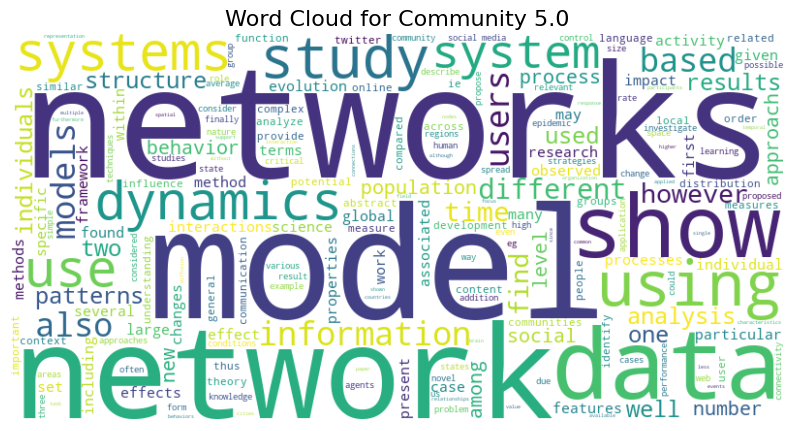

Top authors in Community 5.0:
1. Filippo Menczer
2. Alain Barrat
3. Emilio Ferrara




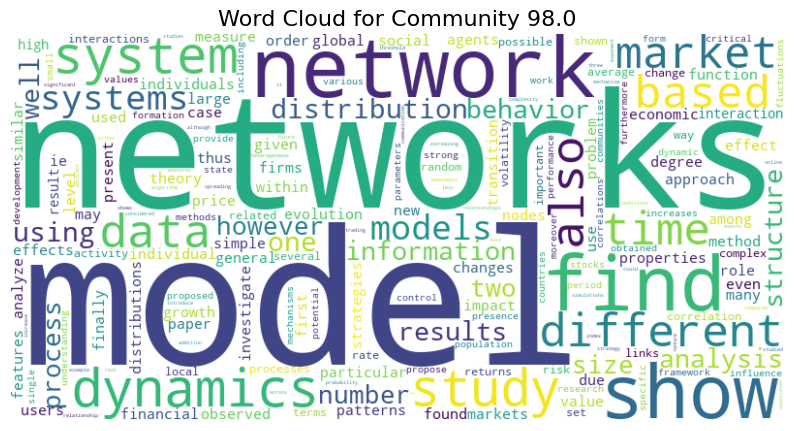

Top authors in Community 98.0:
1. János Kertész
2. H. Eugene Stanley
3. Fabrizio Lillo




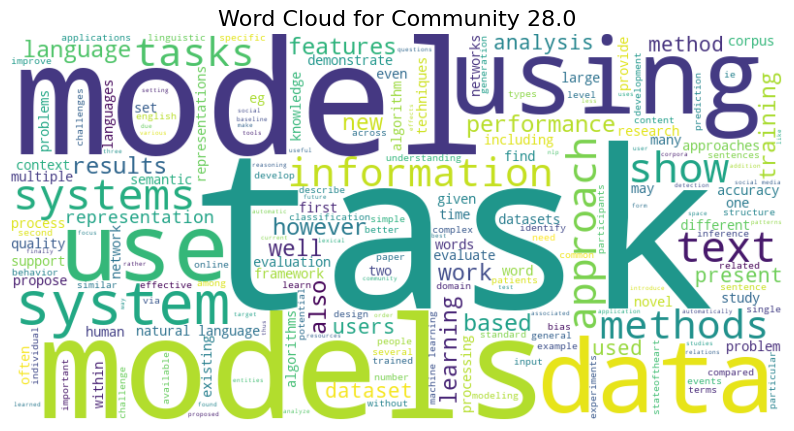

Top authors in Community 28.0:
1. Dan Jurafsky
2. Ryan Cotterell
3. Arkaitz Zubiaga




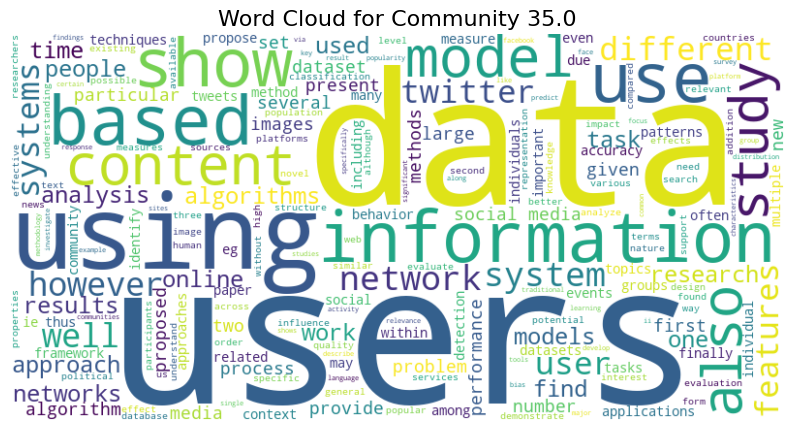

Top authors in Community 35.0:
1. Ingmar Weber
2. Carlos Castillo
3. Emilio Zagheni




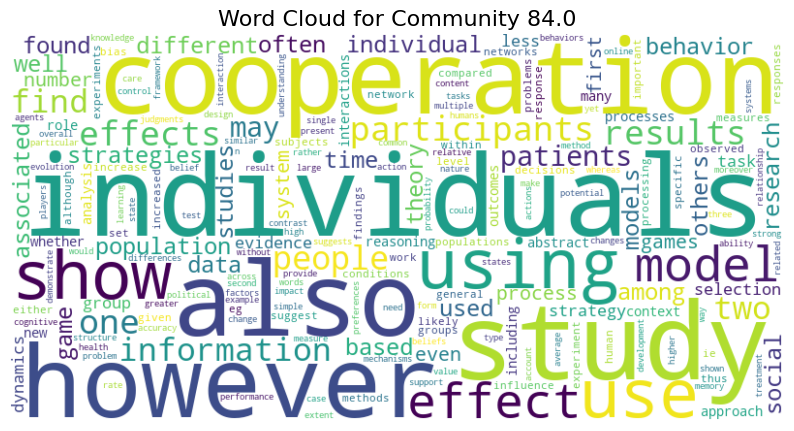

Top authors in Community 84.0:
1. David G. Rand
2. Nicholas A. Christakis
3. Gordon Pennycook




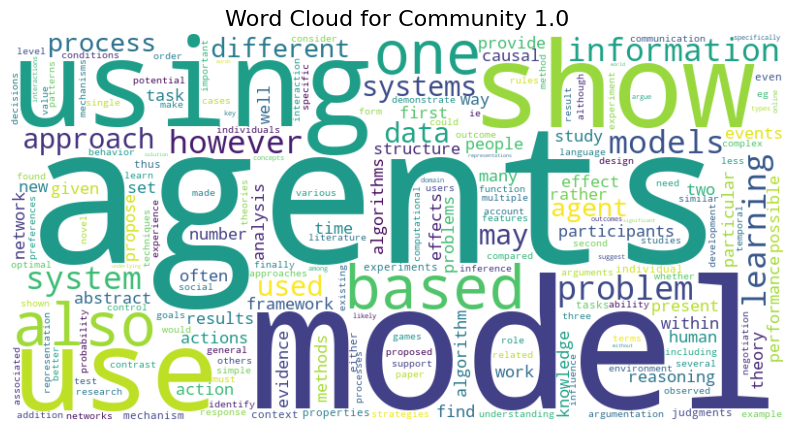

Top authors in Community 1.0:
1. Iyad Rahwan
2. David A. Lagnado
3. Pascal Van Hentenryck




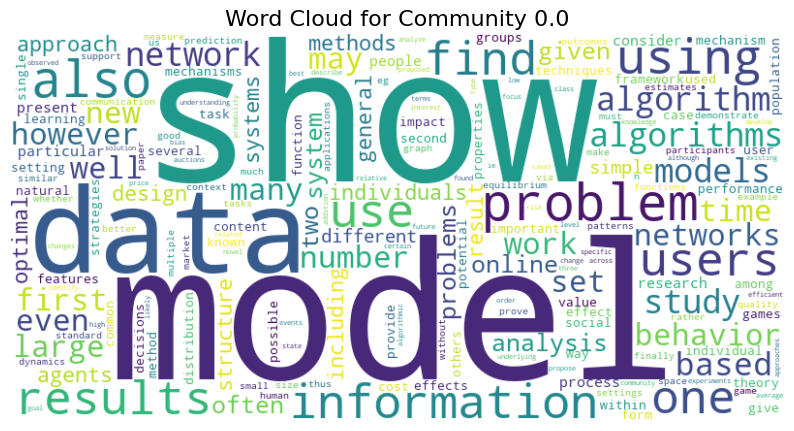

Top authors in Community 0.0:
1. Jon Kleinberg
2. Duncan J. Watts
3. Sharad Goel




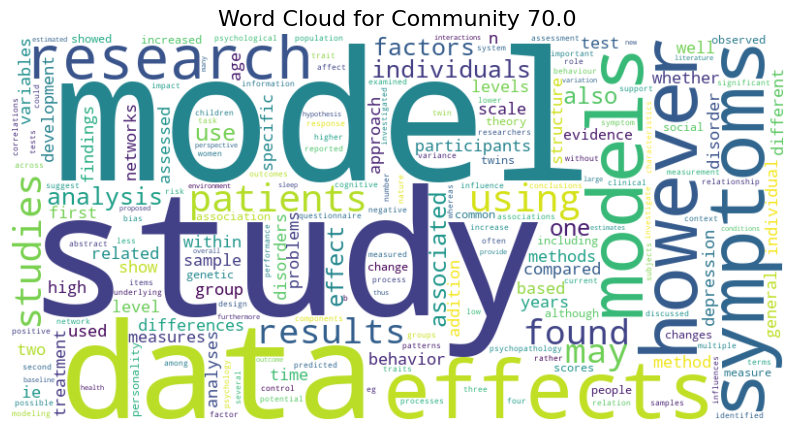

Top authors in Community 70.0:
1. Denny Borsboom
2. Sacha Epskamp
3. Marieke Wichers




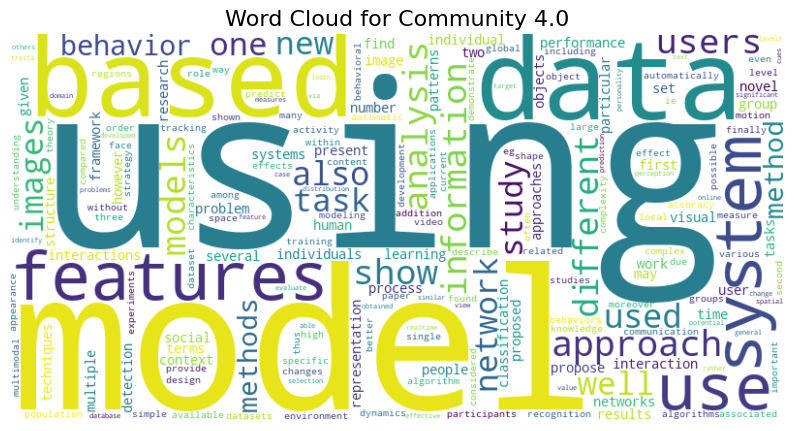

Top authors in Community 4.0:
1. Alex Pentland
2. Bruno Lepri
3. Alex Pentland




In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re


authors_data = pd.read_csv('final_authors.csv')
def generate_wordcloud(community_id, tokens_list, top_authors):
    tokens_list = [token for token in tokens_list if not bool(re.search(r'\d', token))]
    word_freq = Counter(tokens_list)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Community {community_id}', fontsize=16)
    plt.axis('off')
    plt.show()
    print(f"Top authors in Community {community_id}:")
    for i, author in enumerate(top_authors, 1):
        print(f"{i}. {author}")
    print("\n")

def get_top_authors_by_degree(community, num_authors):
    community_authors = [author for author, comm in partition.items() if comm == community]
    community_author_degrees = {author: author_degrees.get(author, 0) for author in community_authors}
    top_authors = sorted(community_author_degrees.items(), key=lambda x: x[1], reverse=True)[:num_authors]
    top_author_names = []
    for author_id, _ in top_authors:
        display_name = authors_data.loc[authors_data['id'] == author_id, 'display_name'].values[0]
        top_author_names.append(display_name)
    return top_author_names
for community_id in top_9_communities:
    tokens_list = community_tokens['all_tokens'][community_tokens['community'] == community_id].iloc[0]
    top_authors = get_top_authors_by_degree(community_id, 3)
    generate_wordcloud(community_id, tokens_list, top_authors)


#### Exercise 3: Computational Social Science

- Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science.

> In light of your data-driven analysis, has your understanding of the field changed? How? (max 150 words)

Our work with CSS through the previous 8 weeks has expanded our understanding of how data driven methodologies can be applied to analyse and investigate social interactions. Initially in week 1 we mentioned these three topics:

*Media studies*
- Analysis of the discourse in American elections through sound files. (Time-Series)

*Linguistics*

- Dataset of spelling capabilities throughout history (NLP)
- Coherence between multilingualism and success. (Large-Dataset)

*Friendship Paradox*
- Dataset of amount of friends on facebook. (Large-Dataset)

Even though we did not end up investigating these topics, we got to investigate how computational analysis can reveal the impeach of CSS. For example, applying natural language processing to scientific papers which can uncover linguistic trends and key words, indicating the focus of a community. This experience emphasises the interdisciplinary nature of CSS, and has highlighted the importance of vast amounts of data in understanding human behaviour and social trends